In [1]:
# As seguintes librarias serão necessárias para resolver os exercícios
# O numpy permite efetuar cálculos de forma eficiente
# sobre vários números (arrays)
import numpy as np
# O matplotlib e o seu módulo pyplot oferecem
# uma interface simples para gerar gráficos
import matplotlib.pyplot as plt

# Exercício 1

In [2]:
t = np.array([0, 48, 96, 144, 192, 240, 288, 336, 384])
atividade = np.array([10.03, 7.06, 4.88, 3.38, 2.26, 1.66, 1.14, 0.79, 0.58])

## Parte A

In [3]:
def linreg(x, y):
    data_points = np.size(x)
    
    mul_sum = np.sum(np.multiply(x, y))
    x_sum = np.sum(x)
    y_sum = np.sum(y)
    m_numerator = data_points * mul_sum - x_sum * y_sum
    
    x2_sum = np.sum(np.square(x))
    x_sum2 = np.square(np.sum(x))
    x_denom = data_points * x2_sum - x_sum2
    
    y2_sum = np.sum(np.square(y))
    y_sum2 = np.square(np.sum(y))
    y_denom = data_points * y2_sum - y_sum2
    
    m = m_numerator / x_denom
    b = (x2_sum * y_sum - x_sum * mul_sum) / x_denom
    
    r2 = m_numerator**2 / (x_denom * y_denom)
    
    delta_m = np.absolute(m) * np.sqrt((1 / r2 - 1) / (data_points - 2))
    delta_b = delta_m * np.sqrt(x2_sum / data_points)

    return m, b, r2, delta_m, delta_b

Text(0.5, 1.0, 'Atividade do isótopo')

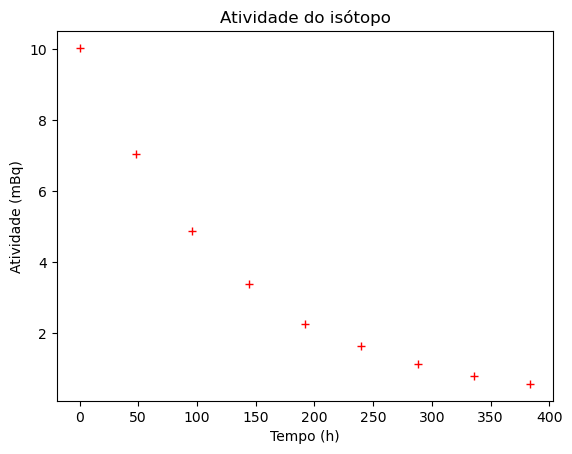

In [4]:
plt.plot(t, atividade, "r+")
plt.xlabel("Tempo (h)")
plt.ylabel("Atividade (mBq)")
plt.title("Atividade do isótopo")

In [5]:
m, b, r2, _, _ = linreg(t, atividade)
print(f"m={m} b={b} r2={r2}")

m=-0.022850694444444448 b=7.918444444444444 r2=0.8635533523596595


Text(0.5, 1.0, 'Atividade do isótopo')

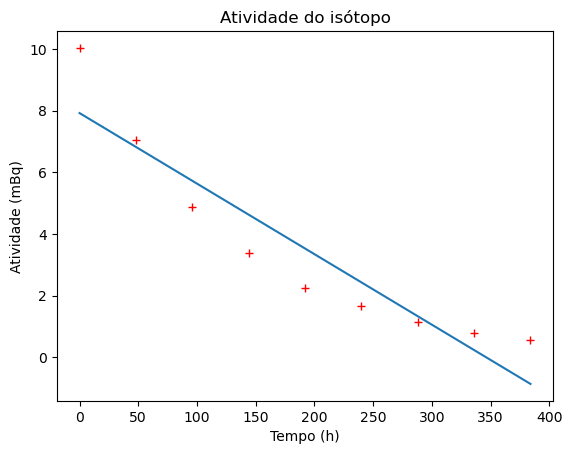

In [6]:
plt.plot(t, atividade, "r+")
plt.plot(t, m * t + b)
plt.xlabel("Tempo (h)")
plt.ylabel("Atividade (mBq)")
plt.title("Atividade do isótopo")

## Parte B

In [7]:
log_atividade = np.log(atividade)
log_m, log_b, log_r2, log_delta_m, _ = linreg(t, log_atividade)

print(f"m={log_m} delta_m={log_delta_m} r2={log_r2}")

m=-0.0074968837801335075 delta_m=6.330605327618063e-05 r2=0.9995011037502568


Text(0.5, 1.0, 'Atividade do isótopo')

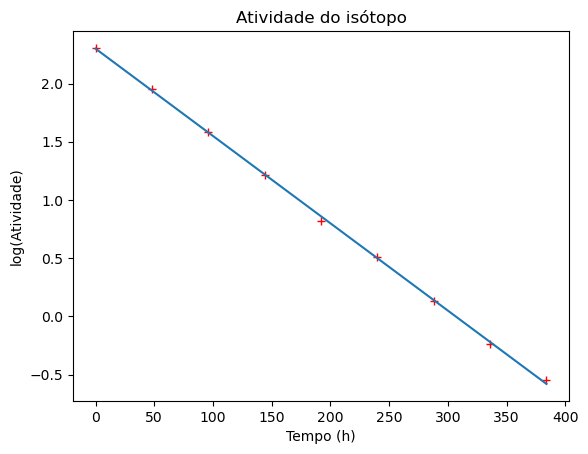

In [8]:
plt.plot(t, log_atividade, "r+")
plt.plot(t, log_m * t + log_b)
plt.xlabel("Tempo (h)")
plt.ylabel("log(Atividade)")
plt.title("Atividade do isótopo")

# Exercício 2

In [9]:
g = 9.8

vNorm = 15
# Convert angle from degrees to radians
angle = 30 / 180 * np.pi

vXinitial = np.cos(angle) * vNorm
vYinitial = np.sin(angle) * vNorm

# Parâmetros
dt = 0.001
t0 = 0
tf = 2
# Agrupamos os valores de x e y em arrays para representar as quantidades
x0 = np.array([0, 2])
v0 = np.array([vXinitial, vYinitial])

# Valores oferecidos
vT = 20
D = g / vT**2

# Número de passos/iterações
#
# + 0.1 para garantir que não há arrendodamentos
# para baixo
n = int((tf-t0) / dt + 0.1)
# O tamanho dos arrays para ser criados, como este tuple tem dois valores
# um array com `n + 1` de arrays bidimensionais
shape = (n + 1, 2)

tRes = np.zeros(n + 1)
xRes = np.zeros(shape)
vRes = np.zeros(shape)
aRes = np.zeros(shape)

# Insert initial values
aRes[0] = np.array([0, -g])
vRes[0] = v0
tRes[0] = t0
xRes[0] = x0

for i in range(n):
    vNorm = np.linalg.norm(vRes[i])
    # Cálculo da aceleração da resistência do ar
    aXRes = -D * vNorm * vRes[i][0]
    aYRes = -D * vNorm * vRes[i][1]
    
    aRes[i + 1] = np.array([aXRes, -g + aYRes])
    vRes[i + 1] = vRes[i] + aRes[i] * dt
    xRes[i + 1] = xRes[i] + vRes[i] * dt
    tRes[i + 1] = tRes[i] + dt

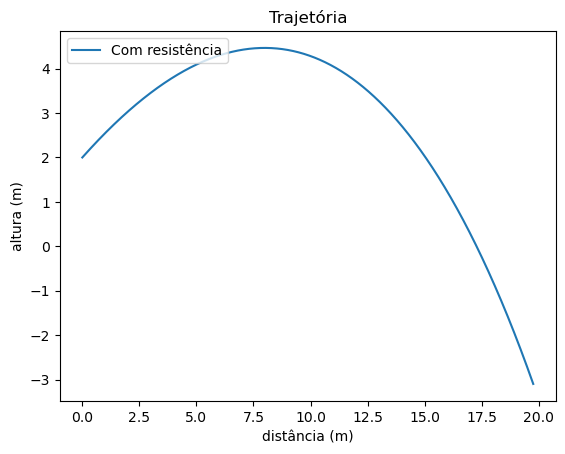

In [10]:
plt.plot(xRes[:, 0], xRes[:, 1], label = "Com resistência")
plt.xlabel("distância (m)")
plt.ylabel("altura (m)")
plt.legend(loc="upper left")
plt.title("Trajetória")
plt.show()

In [11]:
for i in range(n):
    if vRes[i, 1] < 0 and xRes[i, 1] >= 3 and xRes[i + 1, 1] <= 3:
        idx = i
        break
        
print(tRes[i])
print(vRes[i])
print(xRes[i])

1.2439999999999738
[ 9.17004172 -5.11617969]
[13.49619041  3.00317149]
